In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.interpolate import splrep, splev
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [9]:
dep = pd.read_csv('../data/processed/depmap_22q1_crispr_effect_processed_240422.csv', index_col=0)
xpr = pd.read_csv('../data/processed/depmap_22q1_expression_trs_uniprot_only_20220430.csv', index_col=0)

In [42]:
dep[4110:4120]

,143B,22RV1,2313287,253J,42MGBA,5637,59M,639V,647V,697,...,Y79,YAMATO,YAPC,YD15,YD38,YD8,YH13,YKG1,YSCCC,ZR751
gene_name,,,,,,,,,,,,,,,,,,,,,
DNAI3,-0.107769,-0.020750,-0.074987,-0.284766,-0.242226,-0.322151,-0.276871,-0.130367,-0.265342,-0.079223,...,-0.121651,-0.121099,-0.204578,-0.183588,0.056401,-0.240375,-0.034935,-0.132492,-0.084523,-0.050995
DNAI4,-0.084813,-0.195461,-0.075773,-0.226421,-0.065687,-0.076966,-0.160646,-0.132309,-0.081762,-0.262459,...,-0.053470,-0.052695,-0.042957,0.031063,-0.045565,-0.116385,0.091552,0.080092,0.010427,-0.021020
DNAI7,-0.067529,-0.102074,-0.114439,-0.073937,0.004974,-0.000546,-0.106459,-0.055136,-0.054280,0.020659,...,-0.055955,0.109167,-0.201220,-0.014498,-0.179573,-0.040345,-0.181128,0.040876,0.066089,-0.054537
DNAJA1,-0.314607,-0.832417,-0.563705,-0.402511,-0.376326,-0.599539,-0.463344,-0.381198,-0.609830,-0.569421,...,-0.591948,-0.512746,-0.262540,-0.449549,-0.370597,-0.779094,-0.294749,-0.272762,-0.626212,-0.544134
DNAJA2,-0.073383,-0.510377,-0.012950,0.057888,0.020513,-0.205781,-0.081273,-0.041098,0.010098,-0.045328,...,0.027732,0.042033,0.053700,-0.221064,0.017562,-0.028707,-0.036697,-0.040001,-0.243573,-0.257314
DNAJA3,-1.126114,-0.777733,-0.625529,-0.847088,-0.979418,-0.849021,-1.521962,-0.784154,-1.097182,-1.208762,...,-1.247005,-0.717215,-0.917462,-0.583106,-0.988625,-0.671678,-0.914143,-0.727310,-1.053313,-0.717855
DNAJA4,0.170852,0.179131,0.063262,0.095353,0.104750,0.044274,0.044975,0.024044,0.159697,-0.180468,...,0.108442,-0.123721,0.067565,0.191602,0.212268,0.022162,0.167865,0.134868,0.161077,0.087318
DNAJB1,-0.197304,-0.010762,-0.216201,-0.177850,-0.202107,-0.246686,-0.375008,-0.050087,-0.225934,0.002816,...,-0.280107,-0.117551,-0.348015,-0.285542,-0.242797,-0.210939,-0.056866,-0.106625,-0.222227,0.016100
DNAJB11,-0.176449,-0.126202,-0.137741,-0.331624,-0.261069,-0.250094,-0.198689,-0.204926,-0.230768,-0.299371,...,-0.142142,-0.150080,-0.349661,-0.440635,-0.385352,0.013928,-0.405180,-0.078202,-0.148073,-0.213169


(-0.6, 0.6)

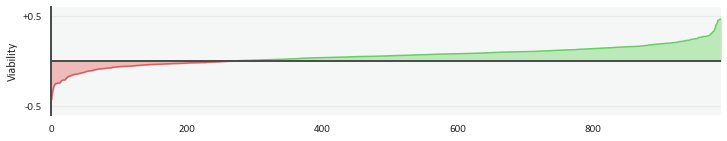

In [132]:
sns.set_theme(palette='deep',
              rc={'figure.figsize': (12,2),
                  'font.sans-serif': 'Calibri',
                  'font.size': 13,
                  'axes.grid.axis': 'y',
                  'axes.spines.left': True,
                  'axes.spines.bottom': False,
                  'axes.spines.top': False,
                  'axes.spines.right': False,
                  'axes.facecolor': '#f5f7f7',
                  'axes.edgecolor': '0.3',
                  'axes.linewidth': 2,
                  'grid.color': '0.92',
                  'grid.linewidth': 1.4})

plt.xlim([-0.7,len(dep.columns)-1])
plt.yticks([-1,-0.5,0.5,1], ['-1','-0.5','+0.5', '+1'])
plt.ylabel('Viability')
gene_dep = dep.loc['A2ML1'].sort_values().reset_index(drop=True)
gene_dep_neg = gene_dep[gene_dep < -0.0]
gene_dep_pos = gene_dep[gene_dep > 0.0]
a = sns.lineplot(x=[-2,len(dep.columns)+1], y=[0,0], color='0.3', linewidth=2, zorder=3)
b = sns.lineplot(x=gene_dep_neg.index, y=gene_dep_neg.values, color='#d65f5f', zorder=2)
c = sns.lineplot(x=gene_dep_pos.index, y=gene_dep_pos.values, color='#69cc64', zorder=2)
plt.fill_between(gene_dep_neg.index, gene_dep_neg.values, color='#eebbbb',zorder=1)
plt.fill_between(gene_dep_pos.index, gene_dep_pos.values, color='#bce9ba',zorder=1)
plt.ylim([min(-0.6,gene_dep_neg.min()-0.1),max(0.6,gene_dep_pos.max()+0.1)])

In [3]:
sns.set_theme()

In [38]:
def depheatmap(xpr, dep, gene, subset=None, sort='dependency', vmax='global', ascending=True, save=False):
    """Constructs paired graphs for gene dependency and transcript expression for a given gene.
    
    Parameters:
    """
    
    cols = len(dep.columns)
    
    xprv = xpr.loc[gene]
    depv = dep.loc[gene]
    
    match subset:
        case None:
            pass
        case 'protein_coding':
            xprv = xprv[xprv['trs_type'] == 'protein_coding']
        case list():
            xprv = xprv[xprv.index.isin(subset)]
    
    if xprv.empty:
        raise KeyError('Provided subset is empty for a given gene')
    else:
        xprv = xprv[xprv.columns[:-1]]
    
    if sort == 'dependency':
        depv = depv.sort_values(ascending=ascending)
        xprv = xprv[depv.index]
        depv = depv.reset_index(drop=True)
    elif 'ENST' in sort:
        xprv = xprv.sort_values(sort, axis=1, ascending=ascending)
        depv = depv[xprv.columns]
        depv = depv.reset_index(drop=True)
    else:
        raise KeyError('Provided sort value is not recognized')
        
    match vmax:
        case 'global':
            vmax = xpr[xpr.columns[:-1]].max().max() 
        case 'local':
            vmax = xprv.max().max()
        case int() | float():
            pass
        case _:
            raise TypeError('Provided vmax value is not recognized')
      
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,3+0.4*len(xprv)), 
                             gridspec_kw={'height_ratios': [2, 0.4*len(xprv)]}, dpi=75, layout='constrained')
    
    sns.set_theme({'axes.grid.axis': 'y',  
                         'axes.facecolor': '1.0',
                         'axes.edgecolor': '0.3', 
                         'axes.linewidth': 2, 
                         'grid.color': '0.92', 
                         'grid.linewidth': 1.4,
                         'ytick.left': False,
                         'xtick.labelbottom': False,
                         'ytick.labelright': True})
        
    axes[0].set(xlim=[0, cols - 1],
                yticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3],
                yticklabels=['-3', '-2.5', '-2', '-1.5', '-1', '-0.5', '0', '+0.5', '+1', '+1.5', '+2', '+2.5', '+3'],
                ylabel='Viability',
                ylim=[min(-0.6, depv.min() - 0.1), max(0.6, depv.max() + 0.1)])

    if sort == 'dependency':
        depv_neg = depv[depv < -0.0]
        depv_pos = depv[depv > 0.0]

        sns.lineplot(ax=axes[0], x=[-1, cols + 1], y=[0, 0], color='0.3', linewidth=2, zorder=3)

        sns.lineplot(ax=axes[0], x=depv_neg.index, y=depv_neg.values, color='#d65f5f', zorder=2)
        sns.lineplot(ax=axes[0], x=depv_pos.index, y=depv_pos.values, color='#69cc64', zorder=2)

        axes[0].fill_between(depv_neg.index, depv_neg.values, color='#eebbbb',zorder=1)
        axes[0].fill_between(depv_pos.index, depv_pos.values, color='#bce9ba',zorder=1)

    elif 'ENST' in sort:
        pass
        
    sns.set_theme({'xtick.labelbottom': False,
                    'xtick.bottom': False,
                    'ytick.labelleft': False,
                    'ytick.labelright':True}):
        sns.heatmap(xprv, ax=axes[1], vmin=0.0, vmax=vmax, cmap='viridis', yticklabels=True)
    
    return axes

array([<AxesSubplot:ylabel='Viability'>, <AxesSubplot:ylabel='enst_id'>],
      dtype=object)

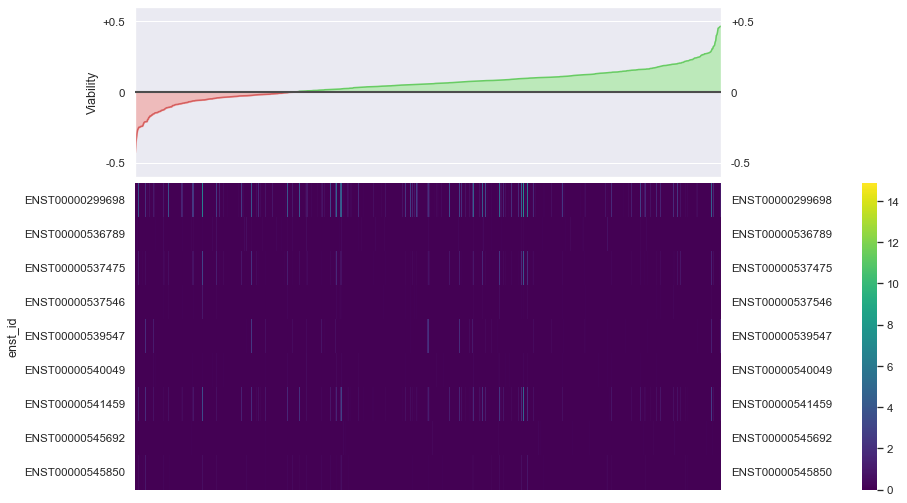

In [39]:
depheatmap(xpr, dep, 'A2ML1')

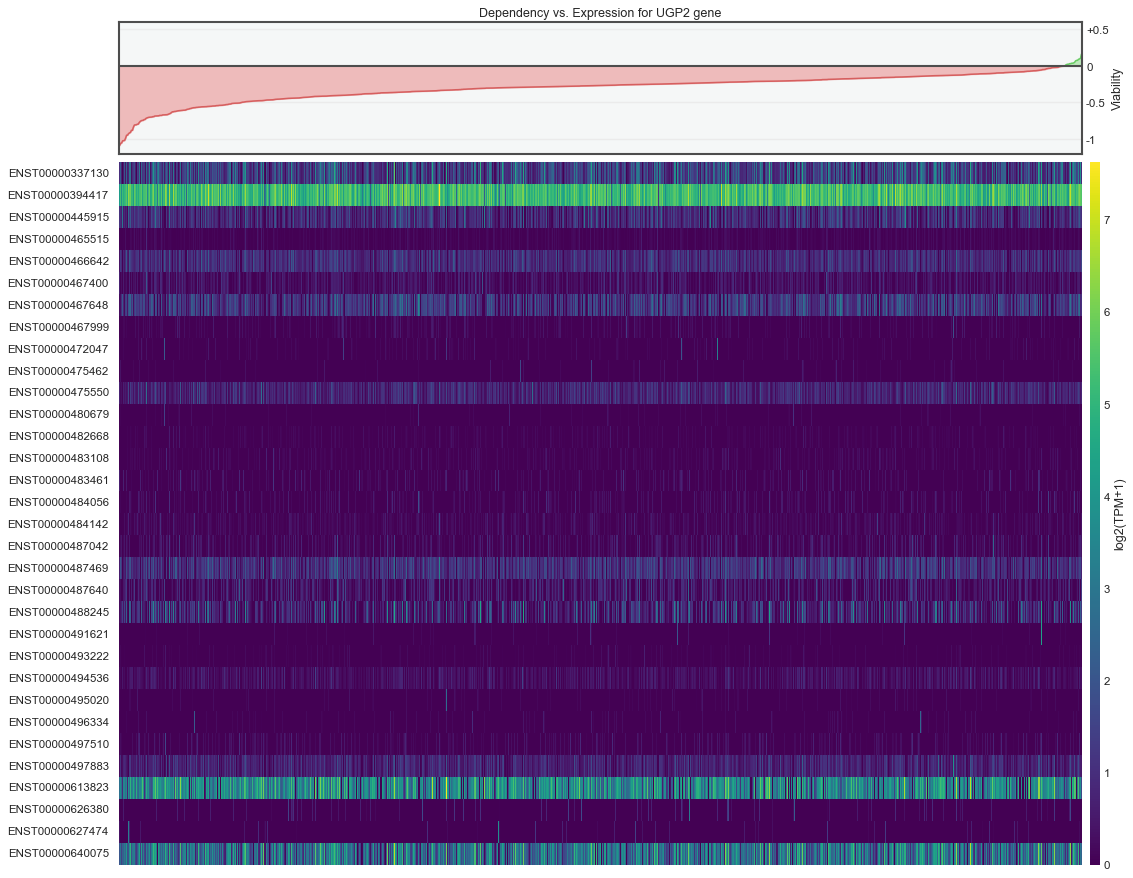

In [5]:
gene = 'UGP2'

cols = len(dep.columns)

xprv = xpr.loc[gene]
depv = dep.loc[gene]

xprv = xprv[xprv.columns[:-1]]

vmax = xprv[xprv.columns[:-1]].max().max()

depv = depv.sort_values()
xprv = xprv[depv.index]
depv = depv.reset_index(drop=True)

fig = plt.figure(layout='constrained', figsize=(15,2+max(1, 0.3*len(xprv))), dpi=75)
spec = GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=[1.8, max(1, 0.3*len(xprv))])

with plt.rc_context({'axes.grid.axis': 'y',  
                     'axes.facecolor': '#f5f7f7',
                     'axes.edgecolor': '0.3', 
                     'axes.linewidth': 2, 
                     'grid.color': '0.92', 
                     'grid.linewidth': 1.4,
                     'ytick.left': False,
                     'ytick.right': True,
                     'xtick.labelbottom': False,
                     'ytick.labelleft': False,
                     'ytick.labelright': True}):
    
    ax1 = fig.add_subplot(spec[0])

    ax1.set(xlim=[0, cols],
            yticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3],
            yticklabels=['-3', '-2.5', '-2', '-1.5', '-1', '-0.5', '0', '+0.5', '+1', '+1.5', '+2', '+2.5', '+3'],
            ylabel='Viability',
            ylim=[min(-0.6, depv.min() - 0.1), max(0.6, depv.max() + 0.1)])
    ax1.yaxis.set_label_position("right")
    
    depv_neg = depv[depv < -0.0]
    depv_pos = depv[depv > 0.0]

    sns.lineplot(ax=ax1, x=[-1, cols + 1], y=[0, 0], color='0.3', linewidth=2, zorder=3)

    sns.lineplot(ax=ax1, x=depv_neg.index, y=depv_neg.values, color='#d65f5f', zorder=2)
    sns.lineplot(ax=ax1, x=depv_pos.index, y=depv_pos.values, color='#69cc64', zorder=2)

    ax1.fill_between(depv_neg.index, depv_neg.values, color='#eebbbb',zorder=1)
    ax1.fill_between(depv_pos.index, depv_pos.values, color='#bce9ba',zorder=1)
    ax1.tick_params(length=0)
    ax1.yaxis.set_label_coords(1.03,0.5)
    ax1.set_title('Dependency vs. Expression for UGP2 gene')

with plt.rc_context(rc={'xtick.labelbottom': False,
                    'xtick.bottom': False,
                    'ytick.right': False,
                    'ytick.labelleft': True,
                    'ytick.labelright': False}):
    
    ax2 = fig.add_subplot(spec[1])
    cbaxes = ax2.inset_axes([997, 0, 10, len(xprv)], transform=ax2.transData)
    s = sns.heatmap(xprv, ax=ax2, vmin=0.0, vmax=vmax, cmap='viridis', yticklabels=True, cbar_ax=cbaxes, cbar_kws={'label':'log2(TPM+1)'})
    s.set_yticklabels(s.get_yticklabels(), rotation=0)
    ax2.set(ylabel=None)
    cbaxes.tick_params(length=0)
    
fig.align_ylabels()

#plt.savefig('deptest.png', dpi=150, bbox_inches='tight')

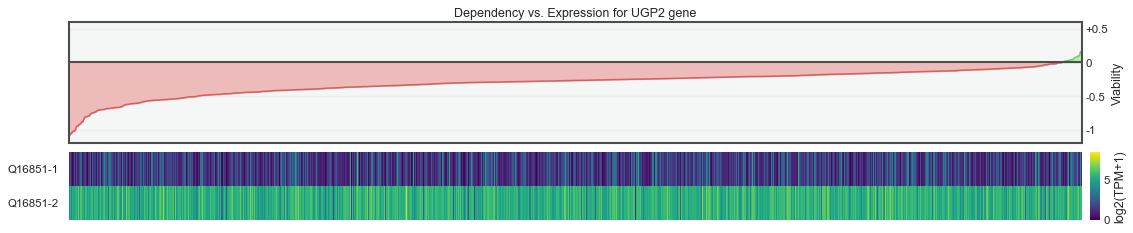

In [11]:
gene = 'UGP2'

cols = len(dep.columns)

xprv = xpr.loc[['Q16851-1', 'Q16851-2'], :]
depv = dep.loc[gene]

vmax = xprv.max().max()

depv = depv.sort_values()
xprv = xprv[depv.index]
depv = depv.reset_index(drop=True)

fig = plt.figure(layout='constrained', figsize=(15,2+max(1, 0.3*len(xprv))), dpi=75)
spec = GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=[1.8, max(1, 0.3*len(xprv))])

with plt.rc_context({'axes.grid.axis': 'y',  
                     'axes.facecolor': '#f5f7f7',
                     'axes.edgecolor': '0.3', 
                     'axes.linewidth': 2, 
                     'grid.color': '0.92', 
                     'grid.linewidth': 1.4,
                     'ytick.left': False,
                     'ytick.right': True,
                     'xtick.labelbottom': False,
                     'ytick.labelleft': False,
                     'ytick.labelright': True}):
    
    ax1 = fig.add_subplot(spec[0])

    ax1.set(xlim=[0, cols],
            yticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3],
            yticklabels=['-3', '-2.5', '-2', '-1.5', '-1', '-0.5', '0', '+0.5', '+1', '+1.5', '+2', '+2.5', '+3'],
            ylabel='Viability',
            ylim=[min(-0.6, depv.min() - 0.1), max(0.6, depv.max() + 0.1)])
    ax1.yaxis.set_label_position("right")
    
    depv_neg = depv[depv < -0.0]
    depv_pos = depv[depv > 0.0]

    sns.lineplot(ax=ax1, x=[-1, cols + 1], y=[0, 0], color='0.3', linewidth=2, zorder=3)

    sns.lineplot(ax=ax1, x=depv_neg.index, y=depv_neg.values, color='#d65f5f', zorder=2)
    sns.lineplot(ax=ax1, x=depv_pos.index, y=depv_pos.values, color='#69cc64', zorder=2)

    ax1.fill_between(depv_neg.index, depv_neg.values, color='#eebbbb',zorder=1)
    ax1.fill_between(depv_pos.index, depv_pos.values, color='#bce9ba',zorder=1)
    ax1.tick_params(length=0)
    ax1.yaxis.set_label_coords(1.03,0.5)
    ax1.set_title('Dependency vs. Expression for UGP2 gene')

with plt.rc_context(rc={'xtick.labelbottom': False,
                    'xtick.bottom': False,
                    'ytick.right': False,
                    'ytick.labelleft': True,
                    'ytick.labelright': False}):
    
    ax2 = fig.add_subplot(spec[1])
    cbaxes = ax2.inset_axes([997, 0, 10, len(xprv)], transform=ax2.transData)
    s = sns.heatmap(xprv, ax=ax2, vmin=0.0, vmax=vmax, cmap='viridis', yticklabels=True, cbar_ax=cbaxes, cbar_kws={'label':'log2(TPM+1)'})
    s.set_yticklabels(s.get_yticklabels(), rotation=0)
    ax2.set(ylabel=None)
    cbaxes.tick_params(length=0)
    
fig.align_ylabels()

plt.savefig('ugp2-deptest.png', dpi=150, bbox_inches='tight')